In [1]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
df = pd.read_csv('Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col} unique values: {df[col].unique()}")



mainroad unique values: ['yes' 'no']

guestroom unique values: ['no' 'yes']

basement unique values: ['no' 'yes']

hotwaterheating unique values: ['no' 'yes']

airconditioning unique values: ['yes' 'no']

prefarea unique values: ['yes' 'no']

furnishingstatus unique values: ['furnished' 'semi-furnished' 'unfurnished']


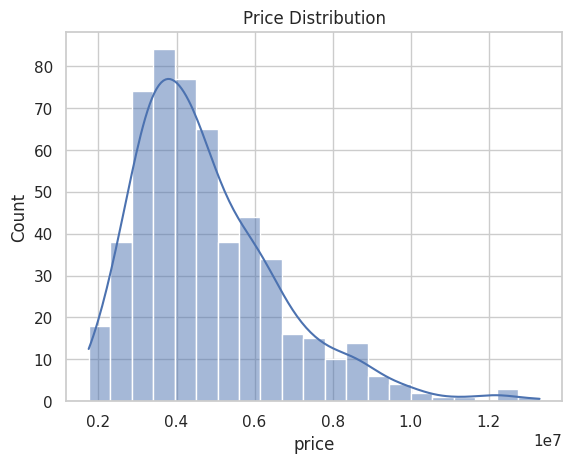

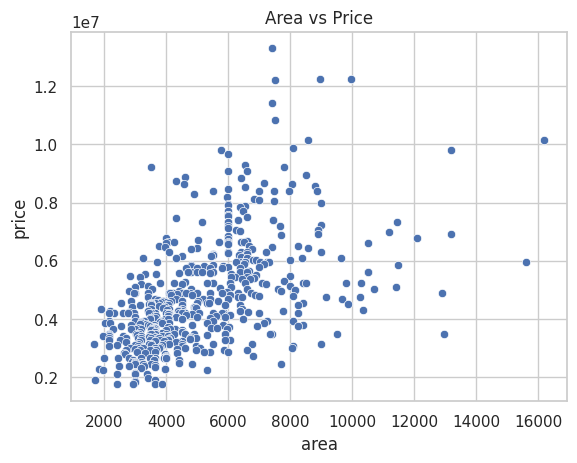

In [7]:
# Histogram of price (target)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Scatter plot for area vs price
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.show()


In [9]:
X = df[['area']]   # independent variable
y = df['price']    # dependent variable


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 2512254.2639593435
Slope: 425.72984193878284


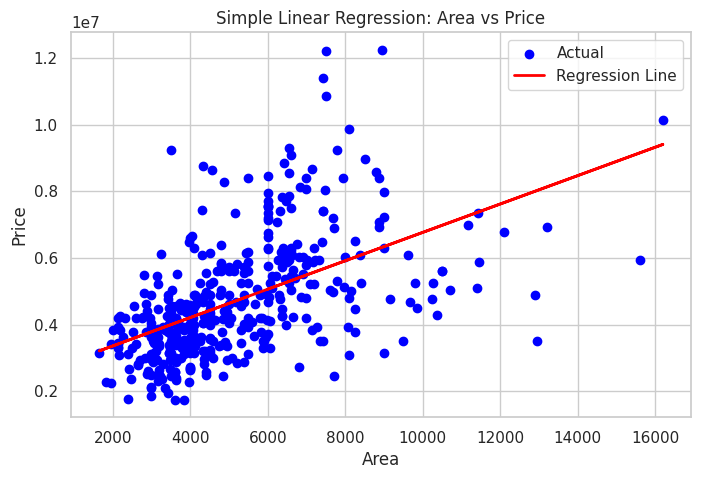

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [16]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 3675286604768.185
R² Score: 0.27287851871974644


In [17]:
# Example: Predict price for a house with 2000 sqft area
area_val = np.array([[2000]])
predicted_price = model.predict(area_val)

print(f"Predicted Price for 2000 sqft: ₹{predicted_price[0]:,.2f}")


Predicted Price for 2000 sqft: ₹3,363,713.95


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
X = df[['area']].values
y = df['price'].values

# Normalize (important for gradient descent)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [19]:
def plot_regression(X, y, theta, title):
    plt.scatter(X, y, label="Data", alpha=0.6)
    y_pred = theta[0] + theta[1] * X
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.title(title)
    plt.xlabel("Normalized Area")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.show()

Epoch 0: MSE = 1.0000
Epoch 100: MSE = 0.7512
Epoch 200: MSE = 0.7179
Epoch 300: MSE = 0.7134
Epoch 400: MSE = 0.7128
Epoch 500: MSE = 0.7127
Epoch 600: MSE = 0.7127
Epoch 700: MSE = 0.7127
Epoch 800: MSE = 0.7127
Epoch 900: MSE = 0.7127


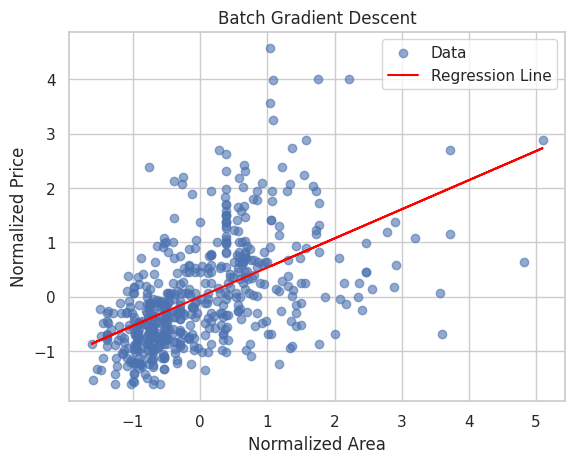

In [20]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for i in range(epochs):
        y_pred = theta[0] + theta[1] * X.flatten()
        error = y_pred - y
        theta[0] -= lr * error.mean()                  # update bias
        theta[1] -= lr * (error * X.flatten()).mean()  # update weight

        if i % 100 == 0:
            mse = (error ** 2).mean()
            print(f"Epoch {i}: MSE = {mse:.4f}")

    return theta

theta_batch = batch_gradient_descent(X, y)
plot_regression(X, y, theta_batch, "Batch Gradient Descent")


Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete


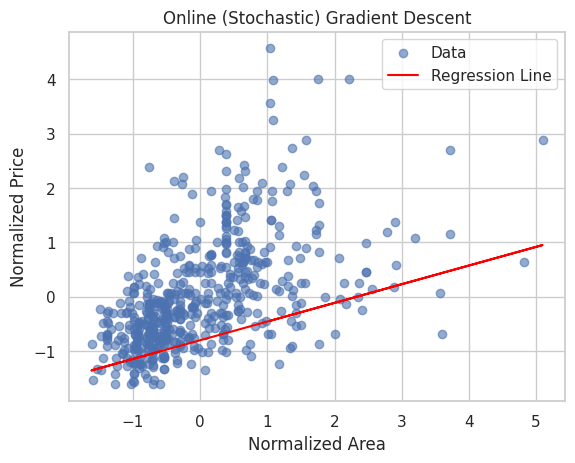

In [21]:
def online_gradient_descent(X, y, lr=0.01, epochs=10):
    m = len(y)
    theta = np.zeros(2)  # [bias, weight]

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i][0]
            yi = y[i]
            y_pred = theta[0] + theta[1] * xi
            error = y_pred - yi

            theta[0] -= lr * error         # update bias
            theta[1] -= lr * error * xi    # update weight

        print(f"Epoch {epoch+1} complete")

    return theta

theta_online = online_gradient_descent(X, y)
plot_regression(X, y, theta_online, "Online (Stochastic) Gradient Descent")


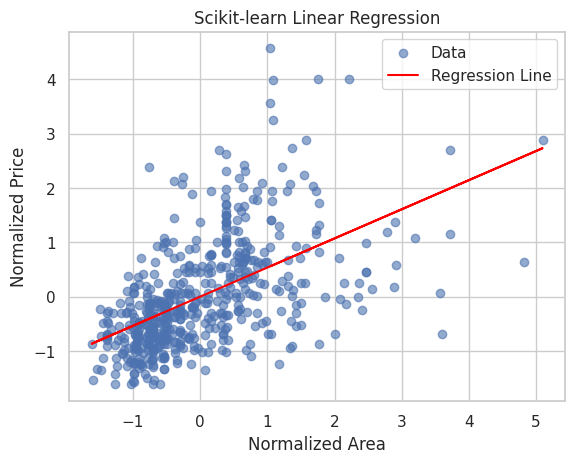

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

theta_sklearn = [model.intercept_, model.coef_[0]]
plot_regression(X, y, theta_sklearn, "Scikit-learn Linear Regression")
